# Exploring features of TF2.0 by developing an effective Cat/Dog Classifier

## Project Description:

In this project, different functionalities of TensorFlow2.0 are explored by developing a Cat & Dog classifier through various approaches. In short, the different techniques used to build the classifier are as follows:

* A CNN-based classifier built from scratch [[Section Link](#Building-a-CNN-based-Cat/Dog-Classifier-from-scratch)]
* Using Data Augmentation techniques buit within TF2.0 to improve CNN-based classifier performance [[Section Link](#Model-train-and-development-using-Data-Augmentation)]
* Exploring *Transer Learning* methods through a pre-trained **VGG-16** model with "*ImageNet*" weights [[Section Link](#Transfer-Learning-Using-VGG16-Model)]
* Observing differences in performance through *Transfer Learning* utilizing a pre-trained **Xception** model with "*ImageNet*" weights [[Section Link](#Transfer-Learning-using-Xception-Model)]

###### - Inference Section [[Section Link](#Inference-Section)]
In this section the developed models (as mentioned above) are used to inference on random images of Cats & Dogs downloaded from the internet in order to assess the efficiency of the classifiers.

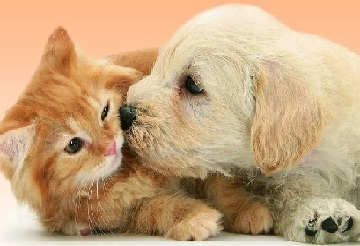  

**- Links to Model Weight files**  
The developed Cat/Dog classifier model weights are available for download through the following links:
- CNN-based Cat/Dog Classifier [[Model Weights Download Link](https://drive.google.com/file/d/1skDcH1x-9bc5uqRSqHhcZuGUfwv-fhIw/view?usp=sharing)]  
- VGG16-based Transfer Learning Classifier [[Model Weights Download Link](https://drive.google.com/file/d/1OXkowOzCssvPCdI3S9VvD508oYXK0rFd/view?usp=sharing)]  
- Xception-based Transfer Learning Classifier [[Model Weights Download Link](https://drive.google.com/file/d/1DV1oJl2sQ9vxlqPPB4DOTMXpTFV36XHQ/view?usp=sharing)]






# Building a CNN-based Cat/Dog Classifier from scratch

Begin by first importing the necessary libraries and checking for their appropriate versions.

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
print(tf.__version__)

2.4.0


### Setting up the data-generators

The Dataset utilized for this project has been procured from **Kaggle's** [Dogs vs.Cats](https://www.kaggle.com/c/dogs-vs-cats) dataset. 
Upon downloading the dataset, set Data-Generators to the respective file locations in order to access train/test data. While defining the Data-Generator objects for both train & test datasets, set the following parameters:

- '**taget_size**': TensorFlow2.0 (**TF2.0**) resizes the images to the set dimensions on the fly without any manual interventions.
- '**batch_size**': The size of the batches for train/test iterations i.e. number of images in one batch.
- '**class_mode**': this parameter is set in order to specify if the dataset corresponds to 2 classes (binary class) or muliple classes (more than 2 classes).

In [4]:
from tensorflow.keras.preprocessing import image
import os

print(os.listdir("CatDogDataset/training_set"))
print(os.listdir("CatDogDataset/test_set"))

['cats', 'dogs']
['cats', 'dogs']


Rescale the images while defining the ImageDataGenerator objects. Since the images are of 8-bit format, each pixel will have a value ranging from 0 to 255 (2^8 - 1) across the RGB channels. Then with appropriate arguments, set the data generators to point to the respective directories where the dataset is stored.


In [7]:
train_gen = image.ImageDataGenerator(rescale = 1/255.0)
test_gen = image.ImageDataGenerator(rescale = 1/255.0)

train_path = "CatDogDataset/training_set"
test_path = "CatDogDataset/test_set"

# No matter the dimensions of the images in the dataset,the data generators 
# will resize the images to 300 X 300 pixels on the fly - in memory while train/test

# test data has total 2023 images so batch size 119 so that its a perfect multiple of total data - 2023 = 119 X 17
# train data has 8006 images (1601 X 5) - the total no. of images may not be broken into batches of equal sizes as 1601 is prime


trainData_gen = train_gen.flow_from_directory(train_path, target_size = (300, 300), batch_size = 16, class_mode = "binary")
testData_gen = test_gen.flow_from_directory(test_path, target_size = (300, 300), batch_size = 16, class_mode = "binary")

#trainData_gen = train_gen.flow_from_directory(train_path, target_size = (300, 300), batch_size = 32, class_mode = "binary")
#testData_gen = test_gen.flow_from_directory(test_path, target_size = (300, 300), batch_size = 32, class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Define the CNN-based model architecture

Taking inspiration from the *VGG(Visual Geometry Group) Net* architecture (like vgg16, 19) which is a padding of repetitive Convolution & Pooling layers to construct a Deep Neural Net, a custom CNN is defined from scratch as below. The summary of the defined model which has **40,345,025** trainable parameters is also shown .

In [39]:
#model definition --

CatDog_classifierModel = tf.keras.models.Sequential([
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu", input_shape = (300, 300, 3)), # 297 X 297
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 294 X 294
                            tf.keras.layers.MaxPooling2D(2, 2), # 147 X 147
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 144X 144
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 141X 141
                            tf.keras.layers.MaxPooling2D(2, 2), # 71 X 71
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Flatten(), # approx no. of units 71^2
                            tf.keras.layers.Dense(128, activation = "relu"),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(32, activation = "relu"),
                            tf.keras.layers.Dense(1, activation = "sigmoid")
])
CatDog_classifierModel.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 297, 297, 64)      3136      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 294, 294, 64)      65600     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 147, 147, 64)      0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 147, 147, 64)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 144, 144, 64)      65600     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 141, 141, 64)      65600     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 70, 70, 64)      

### Setting up for training the model

To expidite the training process of the model, an **NVIDIA GeForce GTX1060** GPU has been used along with *tensorflow_gpu*. A small check is initiated (as below) to confirm whether the GPU is available for utilization and tensorflow has identified the GPU via CUDA.

In [21]:
#Check whether a GPU is available
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2500916494123591929
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5060693856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14586137700477841540
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
Num GPUs Available:  1


### Training & Validation for CNN-based Classifier

The model is trained for a couple of iterations. It is observed that the model achieves a little over **98%** accuracy in *20* epochs. However, while evaluating the model on the Test dataset, the model shows a very poor accuracy of ~ **74%** (approx.). Clearly the model is overfitting and techniques to improve model performance needs to be explored.

In [22]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
z
# define call back:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc') > 0.98):
            print("\n Achieved 98%+ Accuracy --Stop Training") # to prevent overfitting
            self.model.stop_training = True

callbacks = myCallback()

# define model loss and compilations and train the model-

# train CNN model on GPU
with tf.device('/device:GPU:0'):
    CatDog_classifierModel.compile(loss = "binary_crossentropy", optimizer = RMSprop(0.001), metrics = ["acc"])
    #CatDog_classifierModel.fit_generator( trainData_gen, steps_per_epoch = 1601, epochs = 15, callbacks = [callbacks])
    CatDog_classifierModel.fit_generator( trainData_gen, steps_per_epoch = 501, epochs = 25, callbacks = [callbacks])
    #CatDog_classifierModel.fit_generator( trainData_gen, steps_per_epoch = 81, epochs = 15, callbacks = [callbacks])

Epoch 1/25
501/501 [==============================] - 175s 344ms/step - loss: 7.8047 - acc: 0.5014
Epoch 2/25
501/501 [==============================] - 174s 348ms/step - loss: 0.7278 - acc: 0.5303
Epoch 3/25
501/501 [==============================] - 174s 347ms/step - loss: 0.7100 - acc: 0.5571
Epoch 4/25
501/501 [==============================] - 176s 351ms/step - loss: 0.7364 - acc: 0.6260
Epoch 5/25
501/501 [==============================] - 175s 350ms/step - loss: 0.6623 - acc: 0.6674
Epoch 6/25
501/501 [==============================] - 175s 348ms/step - loss: 0.6072 - acc: 0.7004
Epoch 7/25
501/501 [==============================] - 175s 349ms/step - loss: 0.5451 - acc: 0.7442
Epoch 8/25
501/501 [==============================] - 237s 473ms/step - loss: 0.4970 - acc: 0.7794
Epoch 9/25
501/501 [==============================] - 273s 545ms/step - loss: 0.4312 - acc: 0.8231
Epoch 10/25
501/501 [==============================] - 305s 608ms/step - loss: 0.3700 - acc: 0.8477
Epoch 11/

In [23]:
# check the performance of the model
CatDog_classifierModel.evaluate_generator(testData_gen, steps = 21 )
#CatDog_classifierModel.evaluate_generator(testData_gen, steps = 127 )
#CatDog_classifierModel.evaluate_generator(testData_gen, steps = 64)

C:\Users\palin\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[4.249651908874512, 0.6309523582458496]

# Model train and development using Data Augmentation

Regularization techniques like Data Augmentation are an effective way to mitigate overfitting - especially for *Computer Vision* applications. **TF2.0** enables *Data Augmentation* functionalities such as, shifting the image by a certain amount of pixels, rotating the image to a certain extent as well as zooming-in to the image. Such options are provided through the parameter arguments in the **ImageDataGenerator** object.

Just as before, the same model definition has been instantiated.

In [1]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline

def createCatDogClassifier():
    CatDog_classifierModel = tf.keras.models.Sequential([
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu", input_shape = (300, 300, 3)), # 297 X 297
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 294 X 294
                            tf.keras.layers.MaxPooling2D(2, 2), # 147 X 147
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 144X 144
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 141X 141
                            tf.keras.layers.MaxPooling2D(2, 2), # 71 X 71
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Flatten(), # approx no. of units 71^2
                            tf.keras.layers.Dense(128, activation = "relu"),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(32, activation = "relu"),
                            tf.keras.layers.Dense(1, activation = "sigmoid")
    ])
    CatDog_classifierModel.compile(loss = "binary_crossentropy", optimizer = RMSprop(0.001), metrics = ["acc"])
    return CatDog_classifierModel

Using TensorFlow backend.


### Setting up ImageDataGenerator object & setting Data Augmentation arguments

The Augmentation arguments like **rotation_range**, **zoom_range**, **width/height_shift_range** are set in the DataGenerator object as below. For instance, **rotation_range = 45** sets the data generator to randomly rotate the image to about 45 degrees in-memory during the training process.

In [38]:
# using data augmentation for improved accuracy and preventing overfitting
from tensorflow.keras.preprocessing import image
import os

# creating datapipelines

#clear/stop previous session to clear memory
tf.keras.backend.clear_session()

# Applying Data Augmentation for the Training Data Generator -->
train_gen = image.ImageDataGenerator(rescale = 1/255.0,
                                     rotation_range = 45,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     shear_range = 0.25,
                                     zoom_range = 0.25,
                                     fill_mode = "nearest"                                    
                                    )

test_gen = image.ImageDataGenerator(rescale = 1/255.0)

train_path = "CatDogDataset/training_set"
test_path = "CatDogDataset/test_set"

trainData_gen = train_gen.flow_from_directory(train_path, target_size = (300, 300), batch_size = 32, class_mode = "binary")
testData_gen = test_gen.flow_from_directory(test_path, target_size = (300, 300), batch_size = 32, class_mode = "binary")
#trainData_gen = train_gen.flow_from_directory(train_path, target_size = (300, 300), batch_size = 16, class_mode = "binary")
#testData_gen = test_gen.flow_from_directory(test_path, target_size = (300, 300), batch_size = 16, class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Prepare the defined model instance & create a checkpoint to load saved model versions

In [42]:
# Restart Training from a checkpoint

# load model weights when necessary
#weightpath = "[DataAugment]RETRY_CatDogClassifier_TrainAcc_67_testAcc_69_01.h5"
#weightpath = "[DataAugment]RETRY_CatDogClassifier_TrainAcc_73_testAcc_76_87.h5"
#weightpath = "[DataAugment]RETRY_CatDogClassifier_TrainAcc_78_testAcc_79_14_Epoch.h5"
#weightpath = "[DataAugment]RETRY_CatDogClassifier_TrainAcc_80_testAcc_81_66.h5"

weightpath = "[DataAugment]RETRY_CatDogClassifier_TrainAcc_84_73_testAcc_84_63.h5"

CatDogClassifierModel = createCatDogClassifier()
CatDogClassifierModel.load_weights(weightpath)

loss, accuracy = CatDogClassifierModel.evaluate_generator(testData_gen, steps = 64 )
print("Loaded weights model, accuracy: {:5.2f}%".format(100 * accuracy))

Loaded weights model, accuracy: 84.63%


In [43]:
CatDogClassifierModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 297, 297, 64)      3136      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 294, 294, 64)      65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 147, 147, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 147, 147, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 144, 144, 64)      65600     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 141, 141, 64)      65600     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 70, 70, 64)       

### Train & Logs

Prepare training the model by initiating model compilation and fitting the model on the test data. The model is trained on a **GTX 1060 GPU** for **800** iterations (took about 64 hours !!), hence achieving a validation accuracy of ~ **84%**(approx.) which is a significant improvement over the previous attempt made to develop the classfier. However, better performance can be achieved with *Data Audmentation* by exploring other changes in the architecture of the model; probably, by making the model a bit deeper or employing batch normalization layers.

In [ ]:
# define call back:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc') > 0.995):
            print("\n Achieved 99.5%+ Accuracy --Stop Training") # to prevent overfitting | assess model performance
            self.model.stop_training = True

callbacks = myCallback()
history = None

# create New Model Instance
#CatDogClassifierModel = createCatDogClassifier()

# train CNN model on GPU
with tf.device('/device:GPU:0'):
    #CatDogClassifierModel.compile(loss = "binary_crossentropy", optimizer = RMSprop(lr = 0.00001, momentum = 0.9), metrics = ["acc"])
    #CatDogClassifierModel.compile(loss = "binary_crossentropy", optimizer = RMSprop(lr = 0.000001, momentum = 0.9), metrics = ["acc"])
    CatDogClassifierModel.compile(loss = "binary_crossentropy", optimizer = RMSprop(lr = 0.000000000000001, momentum = 0.9), metrics = ["acc"])
    history = CatDogClassifierModel.fit(trainData_gen,
                                        steps_per_epoch = 250, #500,
                                        epochs = 50, #75, #100, #50,
                                        validation_data = testData_gen,
                                        callbacks = [callbacks]
                                       )

In [14]:
loss, accuracy = CatDogClassifierModel.evaluate_generator(testData_gen, steps = 64 )
print("Loaded weights model, accuracy: {:5.2f}%".format(100 * accuracy))

Loaded weights model, accuracy: 83.09%


In [27]:
#CatDogClassifierModel.save("[DataAugment]CatDogClassifier_testAcc_76.h5")
#CatDogClassifierModel.save("[DataAugment]CatDogClassifier_testAcc_79.54.h5")
#CatDogClassifierModel.save("[DataAugment]CatDogClassifier_testAcc_83_98.h5")
#CatDogClassifierModel.save("[DataAugment]RETRY_CatDogClassifier_TrainAcc_71_testAcc_73_26.h5")
#CatDogClassifierModel.save("[DataAugment]RETRY_CatDogClassifier_TrainAcc_73_testAcc_76_87.h5")
#CatDogClassifierModel.save("[DataAugment]RETRY_CatDogClassifier_TrainAcc_76_testAcc_77_31.h5")
#CatDogClassifierModel.save("[DataAugment]RETRY_CatDogClassifier_NotSogreat_Epoch_200_250.h5")
#CatDogClassifierModel.save("[DataAugment]RETRY_CatDogClassifier_TrainAcc_78_testAcc_79_14_Epoch.h5")
#CatDogClassifierModel.save("[DataAugment]RETRY_CatDogClassifier_TrainAcc_80_testAcc_81_66.h5")
CatDogClassifierModel.save("[DataAugment]RETRY_CatDogClassifier_TrainAcc_84_73_testAcc_84_63.h5")

In [9]:
# store session data
import pandas as pd
sessDF = {
    "train_Acc": acc,
    "valid_Acc": val_acc,
    "train_Loss": loss,
    "valid_Loss": val_loss,
    "epochs" : epochs
}

sessDF = pd.DataFrame(sessDF)
#sessDF.to_csv("Train_Valid_SessionData_0_50_DataAugment_RETRY.csv", index = False)
#sessDF.to_csv("Train_Valid_SessionData_50_100_DataAugment_RETRY.csv", index = False)
#sessDF.to_csv("Train_Valid_SessionData_100_50_DataAugment_RETRY.csv", index = False)
#sessDF.to_csv("Train_Valid_SessionData_150_200_DataAugment_RETRY.csv", index = False)
#sessDF.to_csv("Train_Valid_SessionData_200_250_DataAugment_RETRY.csv", index = False)
#sessDF.to_csv("Train_Valid_SessionData_250_350_DataAugment_RETRY.csv", index = False)
#sessDF.to_csv("Train_Valid_SessionData_350_450_DataAugment_RETRY.csv", index = False)
sessDF.to_csv("Train_Valid_SessionData_780_800_DataAugment_RETRY.csv", index = False)

#### Model Training logs

The trends in Accuracy and Loss during the entire model training process is shown below.

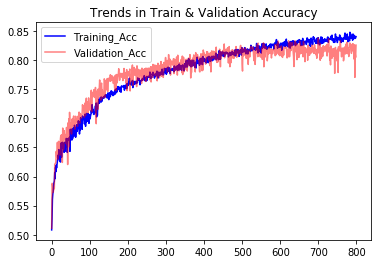

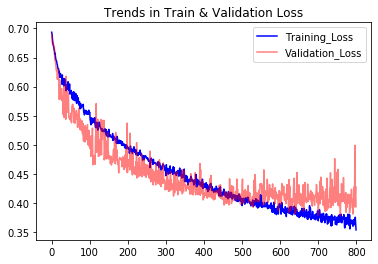

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

trainingDataDF = pd.read_csv("FinalDataAugmentModelTrainLogs.csv")

#Collate the data for visualization from the csv file
train_epochs = list(range(0, 800))
train_loss = trainingDataDF["train_Loss"].to_list()
validation_loss = trainingDataDF["valid_Loss"].to_list()
train_acc = trainingDataDF["train_Acc"].to_list()
validation_acc = trainingDataDF["valid_Acc"].to_list()

#Define the plots for Accuracy & Loss for Training and Validation of the classifier
plt.figure()
plt.title('Trends in Train & Validation Accuracy')
plt.plot(train_epochs, train_acc, 'b', label = 'Training_Acc')
plt.plot(train_epochs, validation_acc, 'r', alpha = 0.5, label = 'Validation_Acc')
plt.legend()
plt.show()
plt.title('Trends in Train & Validation Loss')
plt.plot(train_epochs, train_loss, 'b', label = 'Training_Loss')
plt.plot(train_epochs, validation_loss, 'r', alpha = 0.5, label = 'Validation_Loss')
plt.legend()
plt.show()

# Transfer Learning

In the section Transer Learning techniques are explored with pre-trained Xception & VGG-16 models loaded with their *ImageNet* weights to develop the Cat Dog Classifier.  
**FYI**: [VGG-16 Arxiv paper](https://arxiv.org/pdf/1409.1556.pdf) |  [Xception Arxiv paper](https://arxiv.org/pdf/1610.02357.pdf)  

## Transfer Learning Using VGG16 Model

In this section the **VGG16 model** along with the pre-trained **ImageNet** weight is used to build the classifier. All the Convolutional & Pooling layers are locked and not subjected to training - but 2 Dense layers are padded after the VGG16's locked layers and are trained to obtain the appropriate classifier output.

The setup of *ImageDataGenerators* with *Data Augmentations* is the same as in the previous section. The defined model is trained using the *GTX1060* GPU for 575 iterations.

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

%matplotlib inline

# print the summary of the loaded pre-trained VGG-16 model
#VGG16(include_top = False, input_shape = (300, 300, 3), weights = "imagenet").summary()

def vgg16transferLearningModel():
    vgg16Model = VGG16(include_top = False, input_shape = (300, 300, 3), weights = "imagenet")
    
    for layer in vgg16Model.layers:
        layer.trainable = False
    #add new classifier Dense layers
    flatten_1 = tf.keras.layers.Flatten()(vgg16Model.layers[-1].output)
    classifierDense_1 = tf.keras.layers.Dense(256, activation = "relu", kernel_initializer = "he_uniform")(flatten_1)
    classifierDense_2 = tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_uniform")(classifierDense_1)
    
    outputNeuron = tf.keras.layers.Dense(1, activation = "sigmoid")(classifierDense_2)
    
    #declare model
    vgg16Model = tf.keras.models.Model(inputs = vgg16Model.input, outputs= outputNeuron)
    #compile the defined model
    vgg16Model.compile(optimizer = SGD(lr = 0.001, momentum = 0.9), loss = "binary_crossentropy", metrics = ["acc"])
    return vgg16Model


Using TensorFlow backend.


In [2]:
#define Image Data generator and train/validation data generators
#clear/stop previous session to clear memory
tf.keras.backend.clear_session()

# Applying Data Augmentation for the Training Data Generator -->
train_gen = image.ImageDataGenerator(rescale = 1/255.0,
                                     rotation_range = 45,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     shear_range = 0.25,
                                     zoom_range = 0.25,
                                     fill_mode = "nearest"                                    
                                    )

test_gen = image.ImageDataGenerator(rescale = 1/255.0)

train_path = "CatDogDataset/training_set"
test_path = "CatDogDataset/test_set"

trainData_gen = train_gen.flow_from_directory(train_path, target_size = (300, 300), batch_size = 32, class_mode = "binary")
testData_gen = test_gen.flow_from_directory(test_path, target_size = (300, 300), batch_size = 32, class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
print(tf.test.is_built_with_cuda()) # True for CUDA enabled environment
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12613552818136430342
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5060693856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7955690212072648520
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
True
Num GPUs Available:  1


In [ ]:
# define call back:
"""
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc') > 0.955):
            print("\n Achieved 95.5%+ Accuracy --Stop Training") # to prevent overfitting | assess model performance
            self.model.stop_training = True

callbacks = myCallback()
"""
# learning rate scheduler:-- LR callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-12*10**(epoch/10))
history = None

#create Model Instance
vgg16CatDogClassifier = vgg16transferLearningModel()
vgg16CatDogClassifier.load_weights("vgg16_CatDogClassifier_epo_550_575_TrainAcc_93_ValAcc94.h5")


# train CNN model on GPU
with tf.device("/device:GPU:0"):
    #vgg16CatDogClassifier.compile(optimizer = SGD(lr = 0.001, momentum = 0.9), loss = "binary_crossentropy", metrics = ["acc"])
    vgg16CatDogClassifier.compile(optimizer = SGD(lr = 1e-12, momentum = 0.9), loss = "binary_crossentropy", metrics = ["acc"])
    history = vgg16CatDogClassifier.fit(trainData_gen,
                                        steps_per_epoch = 250,
                                        epochs = 100, #10
                                        validation_data = testData_gen,
                                        callbacks = lr_schedule, #[callbacks]
                                       )

### Variation of Loss with respect to the Learning Rate

Prior to inititating the training process of the model, the **Learning Rate** (**lr**) is varied to observe the variation in **loss** in order to find the optimum value of *lr* to achieve the minimum loss.

[1e-12, 0.01, 0, 0.5]

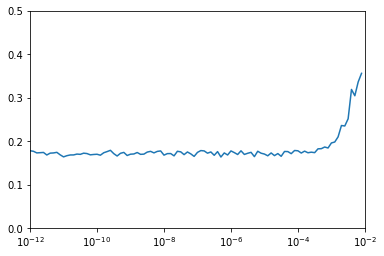

In [17]:
# visualize the Learning Rate with respect to the loss --
import numpy as np
learningRateSchedules = 1e-12 * (10**(np.arange(100)/10))
plt.semilogx(learningRateSchedules, history.history["loss"])
plt.axis([1e-12, 1e-2, 0, 0.5])

#### Model Checkpoint & store the training logs

In [21]:
# store session data
import pandas as pd

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(100))                           

sessDF = {
    "train_Acc": acc,
    "valid_Acc": val_acc,
    "train_Loss": loss,
    "valid_Loss": val_loss,
    "epochs" : epochs
}

sessDF = pd.DataFrame(sessDF)
historyDFName = "vgg16_LRSchedulerCatDogClassifier_DATA.csv"
sessDF.to_csv(historyDFName, index = False)

In [12]:
vgg16CatDogClassifier.summary()
vgg16CatDogClassifier.save("vgg16_CatDogClassifier_epo_550_TrainAcc_93_ValAcc94.h5")

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0   

### Training/Validation Loss & Accuracy Plots of the VGG16 TL-based Model

The trends in *Loss* and *Acccuracy* for the VGG16 Transfer Learning model is displayed below. After *575* iterations, the Train Accuracy achieved is approximately **93%** & Validation Accuracy is approximately **95%**. The Accuracy & Loss curves are quite noisy but they have an overall trend (increasing for *Accuracy* & decreasing for *Loss*) ~ which plateau after the 500th iteration.

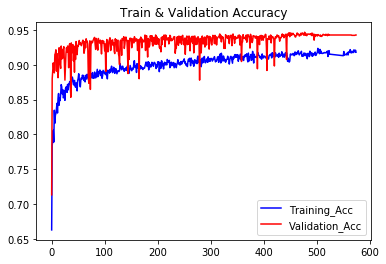

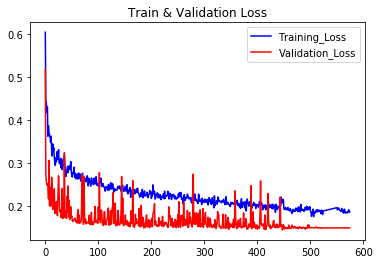

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

historyDF = pd.read_csv("vgg16_FINAL_CatDogClassifierTrainLogs.csv")

# plot learning curve for the epochs
acc = historyDF['train_Acc']
val_acc = historyDF['valid_Acc']
loss = historyDF['train_Loss']
val_loss = historyDF['valid_Loss']
epochs = historyDF['epochs']

plt.figure()
plt.title("Train & Validation Accuracy")
plt.plot(epochs, acc, 'b', label = 'Training_Acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation_Acc')
plt.legend()
plt.show()
plt.title("Train & Validation Loss")
plt.plot(epochs, loss, 'b', label = 'Training_Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation_Loss')
plt.legend()
plt.show()

## Transfer Learning using Xception Model

In this section the **Xception** model along with the pre-trained **ImageNet** weight is used to build the classifier. All the Xception's layers are locked and not subjected to training - but a Global Average Pooling Layer, a DropOut Layer and 2 Dense layers are padded after the locked layers and are trained to obtain the appropriate classifier output.

The setup of ImageDataGenerators with Data Augmentations is the same as in the previous section. The defined model is trained using the **GTX1060 GPU** for **55** iterations.

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.applications.xception import Xception

%matplotlib inline

In [20]:
#define Image Data generator and train/validation data generators
#clear/stop previous session to clear memory
tf.keras.backend.clear_session()

# Applying Data Augmentation for the Training Data Generator -->
train_gen = image.ImageDataGenerator(rescale = 1/255.0,
                                     rotation_range = 45,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     shear_range = 0.25,
                                     zoom_range = 0.25,
                                     fill_mode = "nearest"                                    
                                    )

test_gen = image.ImageDataGenerator(rescale = 1/255.0)

train_path = "CatDogDataset/training_set"
test_path = "CatDogDataset/test_set"

trainData_gen = train_gen.flow_from_directory(train_path, target_size = (300, 300), batch_size = 64, class_mode = "binary")
testData_gen = test_gen.flow_from_directory(test_path, target_size = (300, 300), batch_size = 64, class_mode = "binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [21]:
xceptionModel = Xception(include_top = False, input_shape = (300, 300, 3), weights = "imagenet")
xceptionModel.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [37]:
#instantiate the Xception model definition

def xceptionTransferLearningModel():
    xceptionModel = Xception(include_top = False, input_shape = (300, 300, 3), weights = "imagenet")

    for layer in xceptionModel.layers:
        layer.trainable = False
    
    #add new classifier layers
    xceptionOutput = tf.keras.layers.GlobalAveragePooling2D()(xceptionModel.layers[-1].output)
    classifierDense_1 = tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_uniform")(xceptionOutput)
    dropOut_1 = tf.keras.layers.Dropout(0.2)(classifierDense_1)
    outputNeuron = tf.keras.layers.Dense(1, activation = "sigmoid")(dropOut_1)
    
    #define model
    xceptionModel = tf.keras.models.Model(inputs = xceptionModel.input, outputs= outputNeuron)
    
    #compile the defined model
    xceptionModel.compile(optimizer = SGD(lr = 0.0001, momentum = 0.9), loss = "binary_crossentropy", metrics = ["acc"])
    return xceptionModel


#### Initiate the Training of the Xception Transfer Learning Model

In [39]:
# define call back:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc') > 0.995):
            print("\n Achieved 99.5%+ Accuracy --Stop Training") # to prevent overfitting | assess model performance
            self.model.stop_training = True

callbacks = myCallback()
"""
# learning rate scheduler:-- LR callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-12*10**(epoch/10))
history = None
#"""

#create Model Instance
xceptionModelCatDogClassifier = xceptionTransferLearningModel()

#Load Model weight file
xceptionModelCatDogClassifier.load_weights("Xception_CatDogClassifier_epo_45_55_TrainAcc_98_ValAcc99_5.h5")

# train model on GPU
with tf.device("/device:GPU:0"):
    
    xceptionModelCatDogClassifier.compile( optimizer = SGD(lr = 1e-12, momentum = 0.9),
                                           loss = "binary_crossentropy",
                                           metrics = ["acc"]
                                         )
    history = xceptionModelCatDogClassifier.fit( trainData_gen,
                                                 steps_per_epoch = 125,
                                                 epochs = 100,
                                                 validation_data = testData_gen,
                                                 callbacks = callbacks
                                               )

Epoch 1/10
125/125 [==============================] - 228s 2s/step - loss: 0.0492 - acc: 0.9815 - val_loss: 0.0189 - val_acc: 0.9956
Epoch 2/10
125/125 [==============================] - 221s 2s/step - loss: 0.0467 - acc: 0.9814 - val_loss: 0.0189 - val_acc: 0.9951
Epoch 3/10
125/125 [==============================] - 227s 2s/step - loss: 0.0442 - acc: 0.9824 - val_loss: 0.0189 - val_acc: 0.9951
Epoch 4/10
125/125 [==============================] - 224s 2s/step - loss: 0.0431 - acc: 0.9831 - val_loss: 0.0189 - val_acc: 0.9951
Epoch 5/10
125/125 [==============================] - 223s 2s/step - loss: 0.0438 - acc: 0.9828 - val_loss: 0.0189 - val_acc: 0.9951
Epoch 6/10
125/125 [==============================] - 226s 2s/step - loss: 0.0464 - acc: 0.9835 - val_loss: 0.0189 - val_acc: 0.9951
Epoch 7/10
125/125 [==============================] - 222s 2s/step - loss: 0.0496 - acc: 0.9814 - val_loss: 0.0189 - val_acc: 0.9951
Epoch 8/10
125/125 [==============================] - 225s 2s/step - 

#### Model CheckPoint

In [40]:
xceptionModelCatDogClassifier.save("Xception_CatDogClassifier_epo_40_50_TrainAcc_98_ValAcc99_5.h5")

### Trends in Accuracy & Loss of Train/Validation for Xception TL-based Model

The trends in **Loss** and **Acccuracy** for the *Xception* Transfer Learning model is displayed below. After *55* iterations (just **55!!** lowest of all the models so far & the achieved **Accuracy** supasses all of them), the **Train Accuracy** achieved is approximately **98%** & **Validation Accuracy** is approximately **99.5%** (this is the highest of all the models!!). 

The overall trends in the plots are quite surprising. The *Validation Accuracy* seems to have started at **98%+** and eventually plateaued at **99.5%**, whereas the **Train Accuracy** shows an overall increasing trend with a plateau after **50th** iteration. The **Loss** curves for both *Train* & *Validation* show an overall smooth decreasing trend eventually plateauing.

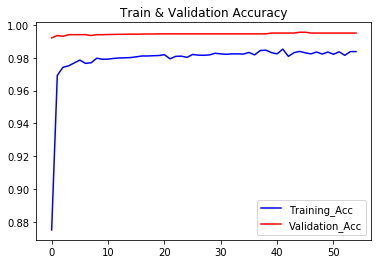

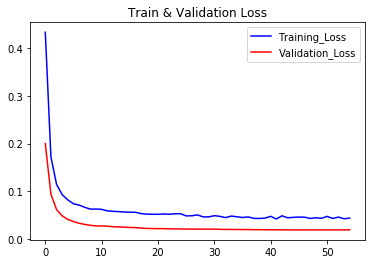

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

historyDF = pd.read_csv("xception_FINAL_CatDogClassifierTrainingLogs.csv")

# plot learning curve for the epochs
acc = historyDF['train_Acc']
val_acc = historyDF['valid_Acc']
loss = historyDF['train_Loss']
val_loss = historyDF['valid_Loss']
epochs = historyDF['epochs']

plt.figure()
plt.title("Train & Validation Accuracy")
plt.plot(epochs, acc, 'b', label = 'Training_Acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation_Acc')
plt.legend()
plt.show()
plt.title("Train & Validation Loss")
plt.plot(epochs, loss, 'b', label = 'Training_Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation_Loss')
plt.legend()
plt.show()

# Inference Section

In this section the developed models are subjected to inference on random images of cats & dogs downloaded from the internet. *50* such images - **25** images of *Dogs* & **25** images of *Cats* - which are not included in the train/validation data set are inferenced by the models and their predictions are observed.

### Preview of downloaded images

In the following cell a random sample of 25 images are picked out of all the downloaded images for preview.

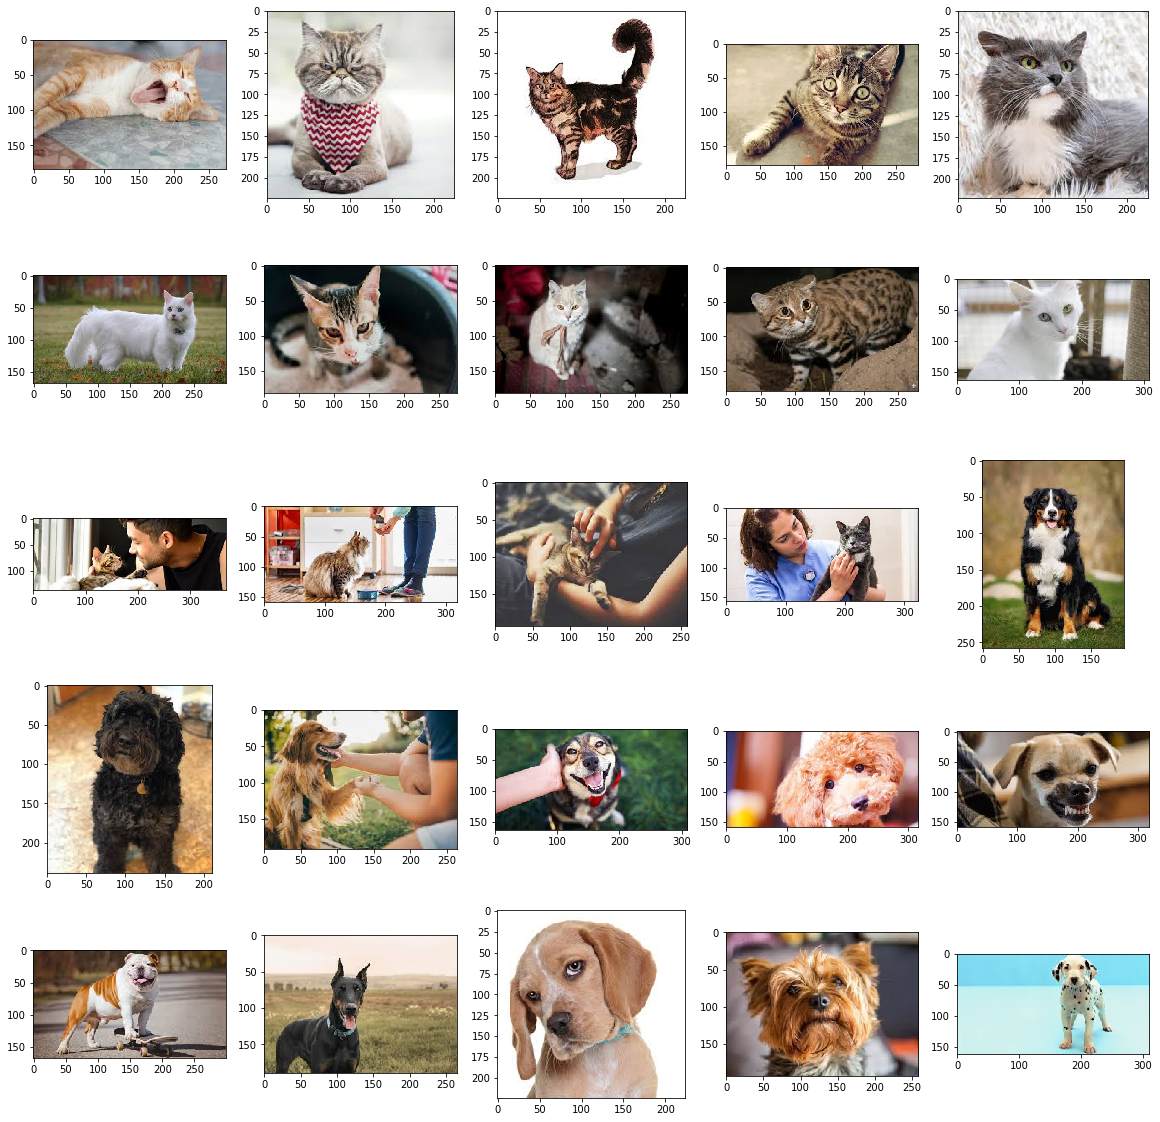

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy
import os
import random
%matplotlib inline

infImgPath = "./Inference_Images/" 
fileList = os.listdir(infImgPath)
subplotNRows = 5; subplotNCols = 5

# get 25 unique random integers
randIndex = []
while len(randIndex) < 25:
    randIndex.append(random.randrange(5, 40))
    randIndex = list(set(randIndex))

# create figure (fig), and array of axes (ax) --> an array of subplots of shape: subplotNRows X subPlotNCols
fig, ax = plt.subplots(nrows = subplotNRows, ncols = subplotNCols, figsize = (20, 20))

for i, axis in enumerate(ax.flat):
    """
    > 'i' is the index for refering to subplot in range 0 to (nrows * ncols)-1
    > take the image with the index from the random integer stored
    """
    infImage = mpimg.imread(infImgPath + str(fileList[randIndex[i]]), 0)
    axis.imshow(infImage)

**Loading the developed models**

In [130]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
import keras
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import os

test_gen = image.ImageDataGenerator(rescale = 1/255.0)
test_path = "CatDogDataset/test_set"
testData_gen = test_gen.flow_from_directory(test_path, target_size = (300, 300), batch_size = 17, class_mode = "binary")

Found 2023 images belonging to 2 classes.


In [84]:
#Load the CNN-based classifier built from scratch
def createCatDogClassifier():
    tf.keras.backend.clear_session()
    CatDog_classifierModel = tf.keras.models.Sequential([
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu", input_shape = (300, 300, 3)), # 297 X 297
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 294 X 294
                            tf.keras.layers.MaxPooling2D(2, 2), # 147 X 147
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 144X 144
                            tf.keras.layers.Conv2D(64, (4, 4), activation = "relu"), # 141X 141
                            tf.keras.layers.MaxPooling2D(2, 2), # 71 X 71
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Flatten(), # approx no. of units 71^2
                            tf.keras.layers.Dense(128, activation = "relu"),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(32, activation = "relu"),
                            tf.keras.layers.Dense(1, activation = "sigmoid")
    ])
    CatDog_classifierModel.compile(loss = "binary_crossentropy", optimizer = RMSprop(0.001), metrics = ["acc"])
    return CatDog_classifierModel

cnnCatDogModel = createCatDogClassifier()
cnnCatDogModel.load_weights("[DataAugment]CatDogClassifier_testAcc_85_17.h5")
loss, accuracy = None, None
with tf.device("/device:GPU:0"):
    loss, accuracy = cnnCatDogModel.evaluate_generator(testData_gen, steps = 17 )
print( "Validation Loss: {} | Validation Accuracy: {}".format(loss, accuracy) )

Validation Loss: 0.2859303057193756 | Validation Accuracy: 0.8858131766319275


In [92]:
#Load the vgg16-based Transfer Learning classifier
def vgg16transferLearningModel():
    tf.keras.backend.clear_session()
    vgg16Model = VGG16(include_top = False, input_shape = (300, 300, 3), weights = "imagenet")
    for layer in vgg16Model.layers:
        layer.trainable = False
    #add new classifier Dense layers
    flatten_1 = tf.keras.layers.Flatten()(vgg16Model.layers[-1].output)
    classifierDense_1 = tf.keras.layers.Dense(256, activation = "relu", kernel_initializer = "he_uniform")(flatten_1)
    classifierDense_2 = tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_uniform")(classifierDense_1)
    outputNeuron = tf.keras.layers.Dense(1, activation = "sigmoid")(classifierDense_2)
    #declare model
    vgg16Model = tf.keras.models.Model(inputs = vgg16Model.input, outputs= outputNeuron)
    #compile the defined model
    vgg16Model.compile(optimizer = SGD(lr = 0.001, momentum = 0.9), loss = "binary_crossentropy", metrics = ["acc"])
    return vgg16Model

vgg16CatDogModel = vgg16transferLearningModel()
vgg16CatDogModel.load_weights("vgg16_CatDogClassifier_epo_550_575_TrainAcc_93_ValAcc94.h5")
with tf.device("/device:GPU:0"):
    loss, accuracy = vgg16CatDogModel.evaluate_generator(testData_gen, steps = 17 )
print( "Validation Loss: {} | Validation Accuracy: {}".format(loss, accuracy) )

Validation Loss: 0.11825060099363327 | Validation Accuracy: 0.9480968713760376


In [94]:
#Load the Xception-based Transfer Learning classifier
def xceptionTransferLearningModel():
    tf.keras.backend.clear_session()
    xceptionModel = Xception(include_top = False, input_shape = (300, 300, 3), weights = "imagenet")
    for layer in xceptionModel.layers:
        layer.trainable = False
    #add new classifier layers
    xceptionOutput = tf.keras.layers.GlobalAveragePooling2D()(xceptionModel.layers[-1].output)
    classifierDense_1 = tf.keras.layers.Dense(128, activation = "relu", kernel_initializer = "he_uniform")(xceptionOutput)
    dropOut_1 = tf.keras.layers.Dropout(0.2)(classifierDense_1)
    outputNeuron = tf.keras.layers.Dense(1, activation = "sigmoid")(dropOut_1)
    #define model
    xceptionModel = tf.keras.models.Model(inputs = xceptionModel.input, outputs= outputNeuron)
    #compile the defined model
    xceptionModel.compile(optimizer = SGD(lr = 0.0001, momentum = 0.9), loss = "binary_crossentropy", metrics = ["acc"])
    return xceptionModel

xceptionCatDogModel = xceptionTransferLearningModel()
xceptionCatDogModel.load_weights("Xception_CatDogClassifier_epo_45_55_TrainAcc_98_ValAcc99_5.h5")
loss, accuracy = None, None
with tf.device("/device:GPU:0"):
    loss, accuracy = xceptionCatDogModel.evaluate_generator(testData_gen, steps = 17 )
print( "Validation Loss: {} | Validation Accuracy: {}".format(loss, accuracy) )

Validation Loss: 0.00758331548422575 | Validation Accuracy: 0.9965397715568542


In the following cell the inference process for obtaining predictions from the models is initiated. In the output of the cell, for each image the predictions from each of the models is printed.

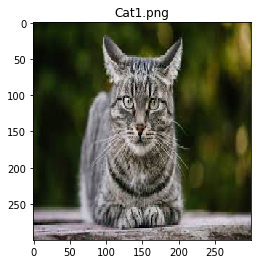

Prediction of Cat1.png:
  CNN-based model: Cat, Model Prediction Score: 0.0029287724755704403
  VGG16 TL model: Cat, Model Prediction Score: 7.157277650549076e-07
  Xception TL model: Cat, Model Prediction Score: 0.0008687492227181792


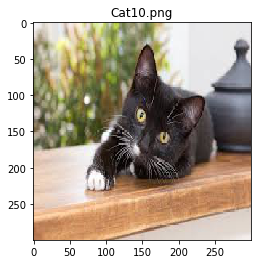

Prediction of Cat10.png:
  CNN-based model: Cat, Model Prediction Score: 0.02388014644384384
  VGG16 TL model: Cat, Model Prediction Score: 2.8251047297089826e-06
  Xception TL model: Cat, Model Prediction Score: 0.00011964636360062286


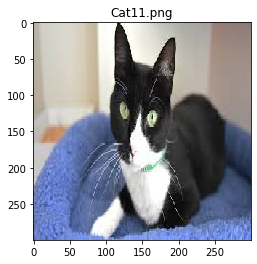

Prediction of Cat11.png:
  CNN-based model: Cat, Model Prediction Score: 1.1155366337334272e-06
  VGG16 TL model: Cat, Model Prediction Score: 0.0008558349800296128
  Xception TL model: Cat, Model Prediction Score: 0.00010234152432531118


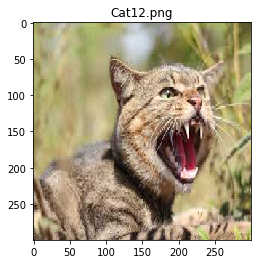

Prediction of Cat12.png:
  CNN-based model: Cat, Model Prediction Score: 0.38444769382476807
  VGG16 TL model: Cat, Model Prediction Score: 9.671512998465914e-06
  Xception TL model: Cat, Model Prediction Score: 0.0014641998568549752


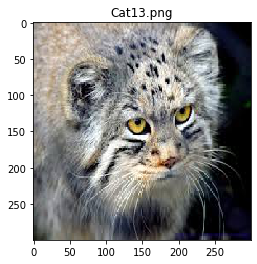

Prediction of Cat13.png:
  CNN-based model: Cat, Model Prediction Score: 0.030985787510871887
  VGG16 TL model: Cat, Model Prediction Score: 6.81373013566855e-11
  Xception TL model: Cat, Model Prediction Score: 0.05471682921051979


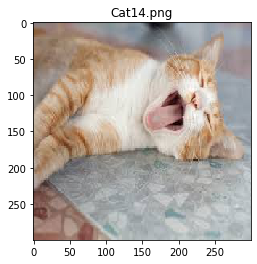

Prediction of Cat14.png:
  CNN-based model: Cat, Model Prediction Score: 0.15990851819515228
  VGG16 TL model: Cat, Model Prediction Score: 0.0006269743898883462
  Xception TL model: Cat, Model Prediction Score: 9.784454596228898e-05


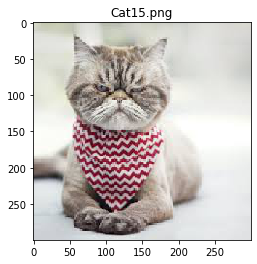

Prediction of Cat15.png:
  CNN-based model: Cat, Model Prediction Score: 0.5258718729019165
  VGG16 TL model: Cat, Model Prediction Score: 1.8694359823712148e-05
  Xception TL model: Cat, Model Prediction Score: 0.0025960663333535194


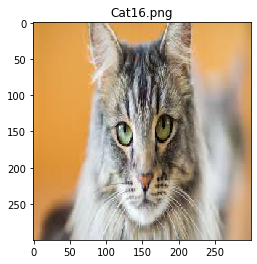

Prediction of Cat16.png:
  CNN-based model: Cat, Model Prediction Score: 0.0012127941008657217
  VGG16 TL model: Cat, Model Prediction Score: 1.5956498344849024e-08
  Xception TL model: Cat, Model Prediction Score: 0.00021914721583016217


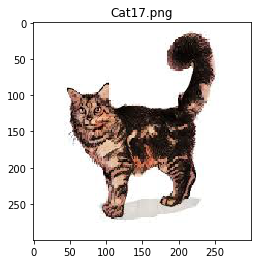

Prediction of Cat17.png:
  CNN-based model: Cat, Model Prediction Score: 0.6187896132469177
  VGG16 TL model: Cat, Model Prediction Score: 0.0021602632477879524
  Xception TL model: Cat, Model Prediction Score: 0.0015051263617351651


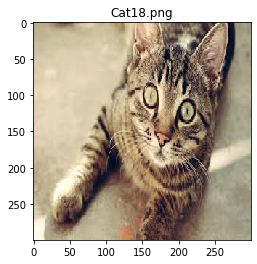

Prediction of Cat18.png:
  CNN-based model: Cat, Model Prediction Score: 0.0004394801799207926
  VGG16 TL model: Cat, Model Prediction Score: 1.4569883433068753e-07
  Xception TL model: Cat, Model Prediction Score: 0.0012047246564179659


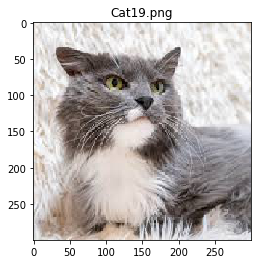

Prediction of Cat19.png:
  CNN-based model: Cat, Model Prediction Score: 0.022373566403985023
  VGG16 TL model: Cat, Model Prediction Score: 7.828585557589918e-10
  Xception TL model: Cat, Model Prediction Score: 8.980204438557848e-05


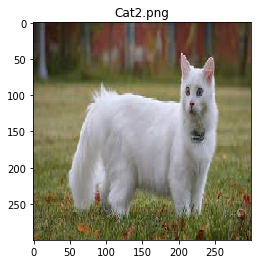

Prediction of Cat2.png:
  CNN-based model: Cat, Model Prediction Score: 0.6304308772087097
  VGG16 TL model: Cat, Model Prediction Score: 0.44168686866760254
  Xception TL model: Cat, Model Prediction Score: 0.009666431695222855


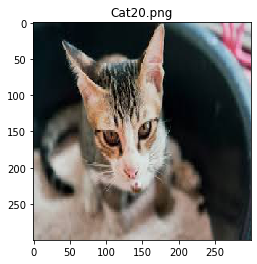

Prediction of Cat20.png:
  CNN-based model: Cat, Model Prediction Score: 0.003018610877916217
  VGG16 TL model: Cat, Model Prediction Score: 5.4649021876684856e-06
  Xception TL model: Cat, Model Prediction Score: 0.0010807712096720934


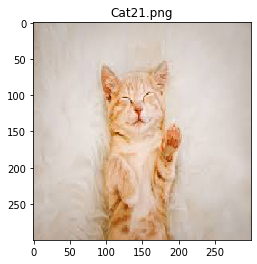

Prediction of Cat21.png:
  CNN-based model: Cat, Model Prediction Score: 0.013471342623233795
  VGG16 TL model: Cat, Model Prediction Score: 0.003354310756549239
  Xception TL model: Cat, Model Prediction Score: 0.0001419344189343974


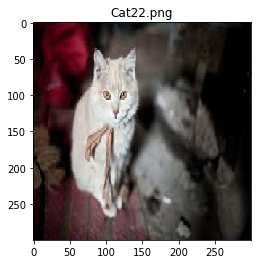

Prediction of Cat22.png:
  CNN-based model: Cat, Model Prediction Score: 0.04097514972090721
  VGG16 TL model: Cat, Model Prediction Score: 0.00033942924346774817
  Xception TL model: Cat, Model Prediction Score: 0.0001739138679113239


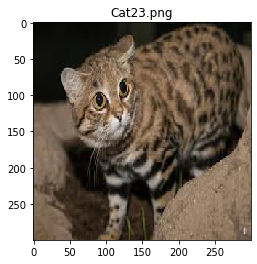

Prediction of Cat23.png:
  CNN-based model: Cat, Model Prediction Score: 0.07284906506538391
  VGG16 TL model: Cat, Model Prediction Score: 0.006640556268393993
  Xception TL model: Cat, Model Prediction Score: 0.00500495033338666


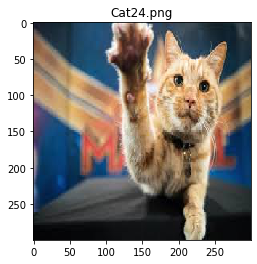

Prediction of Cat24.png:
  CNN-based model: Cat, Model Prediction Score: 0.15541695058345795
  VGG16 TL model: Dog, Model Prediction Score: 0.7268358469009399
  Xception TL model: Cat, Model Prediction Score: 0.000926285982131958


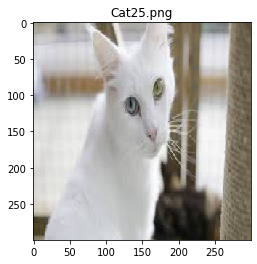

Prediction of Cat25.png:
  CNN-based model: Cat, Model Prediction Score: 0.21641620993614197
  VGG16 TL model: Cat, Model Prediction Score: 0.0037302703130990267
  Xception TL model: Cat, Model Prediction Score: 0.00012737856013700366


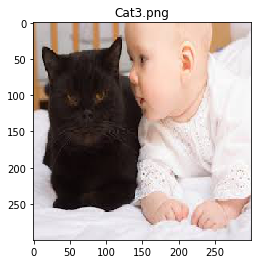

Prediction of Cat3.png:
  CNN-based model: Cat, Model Prediction Score: 0.023822300136089325
  VGG16 TL model: Cat, Model Prediction Score: 0.2672339677810669
  Xception TL model: Cat, Model Prediction Score: 0.00020471273455768824


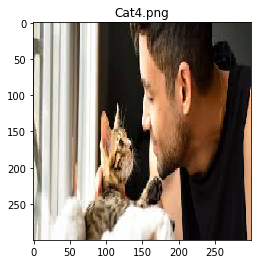

Prediction of Cat4.png:
  CNN-based model: Cat, Model Prediction Score: 0.2992371618747711
  VGG16 TL model: Dog, Model Prediction Score: 0.7867105603218079
  Xception TL model: Cat, Model Prediction Score: 0.0589730367064476


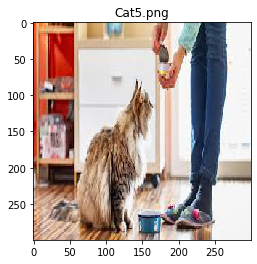

Prediction of Cat5.png:
  CNN-based model: Cat, Model Prediction Score: 0.4725990295410156
  VGG16 TL model: Cat, Model Prediction Score: 0.4633154571056366
  Xception TL model: Cat, Model Prediction Score: 0.008953055366873741


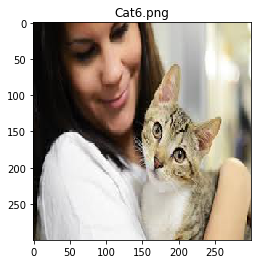

Prediction of Cat6.png:
  CNN-based model: Cat, Model Prediction Score: 0.019079342484474182
  VGG16 TL model: Cat, Model Prediction Score: 3.427734918659553e-05
  Xception TL model: Cat, Model Prediction Score: 0.00018334192282054573


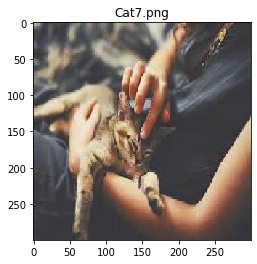

Prediction of Cat7.png:
  CNN-based model: Dog, Model Prediction Score: 0.9286551475524902
  VGG16 TL model: Dog, Model Prediction Score: 0.8383121490478516
  Xception TL model: Cat, Model Prediction Score: 0.1849193125963211


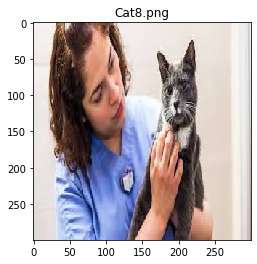

Prediction of Cat8.png:
  CNN-based model: Cat, Model Prediction Score: 0.5574985146522522
  VGG16 TL model: Cat, Model Prediction Score: 0.009115924127399921
  Xception TL model: Cat, Model Prediction Score: 0.00019074531155638397


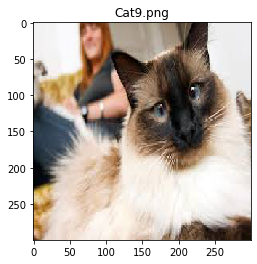

Prediction of Cat9.png:
  CNN-based model: Cat, Model Prediction Score: 0.6376418471336365
  VGG16 TL model: Cat, Model Prediction Score: 0.0006109963287599385
  Xception TL model: Cat, Model Prediction Score: 0.00041787943337112665


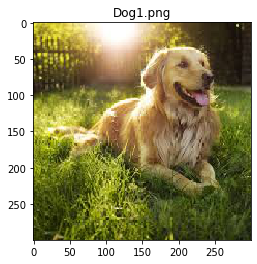

Prediction of Dog1.png:
  CNN-based model: Dog, Model Prediction Score: 0.9005255699157715
  VGG16 TL model: Dog, Model Prediction Score: 0.9999998807907104
  Xception TL model: Dog, Model Prediction Score: 0.9991735816001892


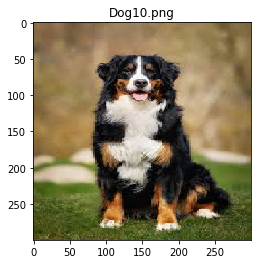

Prediction of Dog10.png:
  CNN-based model: Dog, Model Prediction Score: 0.8826718926429749
  VGG16 TL model: Dog, Model Prediction Score: 0.9989804625511169
  Xception TL model: Dog, Model Prediction Score: 0.880291759967804


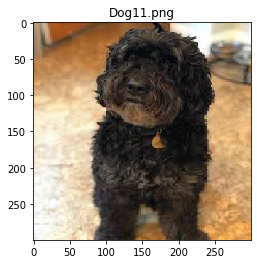

Prediction of Dog11.png:
  CNN-based model: Dog, Model Prediction Score: 0.672000527381897
  VGG16 TL model: Dog, Model Prediction Score: 0.9953280687332153
  Xception TL model: Dog, Model Prediction Score: 0.9638530611991882


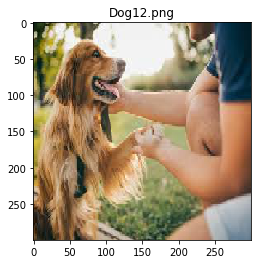

Prediction of Dog12.png:
  CNN-based model: Dog, Model Prediction Score: 0.6815344095230103
  VGG16 TL model: Dog, Model Prediction Score: 0.9999154806137085
  Xception TL model: Dog, Model Prediction Score: 0.9948928356170654


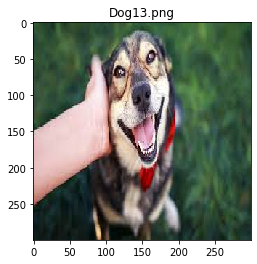

Prediction of Dog13.png:
  CNN-based model: Dog, Model Prediction Score: 0.7199198603630066
  VGG16 TL model: Dog, Model Prediction Score: 0.9999908208847046
  Xception TL model: Dog, Model Prediction Score: 0.9980490207672119


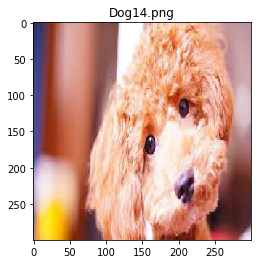

Prediction of Dog14.png:
  CNN-based model: Cat, Model Prediction Score: 0.3102567195892334
  VGG16 TL model: Dog, Model Prediction Score: 0.9917430281639099
  Xception TL model: Dog, Model Prediction Score: 0.9897582530975342


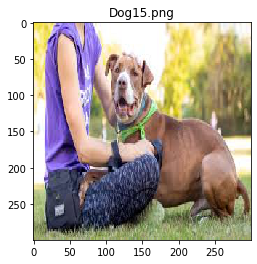

Prediction of Dog15.png:
  CNN-based model: Dog, Model Prediction Score: 0.9248103499412537
  VGG16 TL model: Dog, Model Prediction Score: 0.9999842643737793
  Xception TL model: Dog, Model Prediction Score: 0.9976444840431213


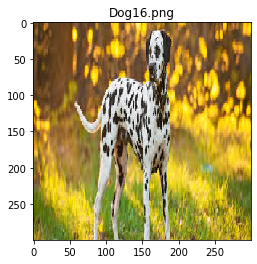

Prediction of Dog16.png:
  CNN-based model: Cat, Model Prediction Score: 0.5928680300712585
  VGG16 TL model: Dog, Model Prediction Score: 0.9957992434501648
  Xception TL model: Dog, Model Prediction Score: 0.9964964985847473


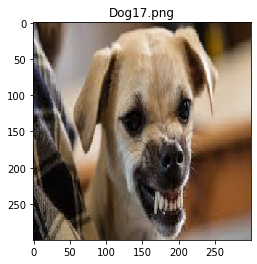

Prediction of Dog17.png:
  CNN-based model: Dog, Model Prediction Score: 0.754002571105957
  VGG16 TL model: Dog, Model Prediction Score: 0.9923183917999268
  Xception TL model: Dog, Model Prediction Score: 0.9997219443321228


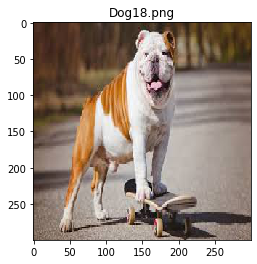

Prediction of Dog18.png:
  CNN-based model: Dog, Model Prediction Score: 0.8693153262138367
  VGG16 TL model: Dog, Model Prediction Score: 0.9998044371604919
  Xception TL model: Dog, Model Prediction Score: 0.9986674785614014


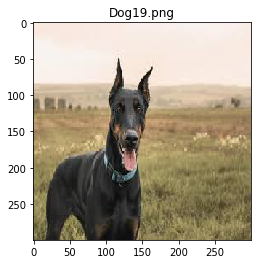

Prediction of Dog19.png:
  CNN-based model: Cat, Model Prediction Score: 0.47836604714393616
  VGG16 TL model: Dog, Model Prediction Score: 0.9821527600288391
  Xception TL model: Dog, Model Prediction Score: 0.952610194683075


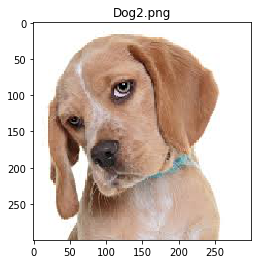

Prediction of Dog2.png:
  CNN-based model: Dog, Model Prediction Score: 0.7252049446105957
  VGG16 TL model: Dog, Model Prediction Score: 0.9999979734420776
  Xception TL model: Dog, Model Prediction Score: 0.9981641173362732


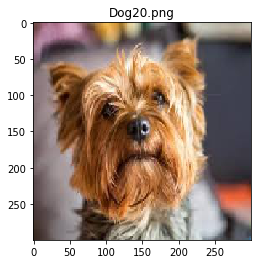

Prediction of Dog20.png:
  CNN-based model: Dog, Model Prediction Score: 0.7986943125724792
  VGG16 TL model: Dog, Model Prediction Score: 1.0
  Xception TL model: Dog, Model Prediction Score: 0.9776125550270081


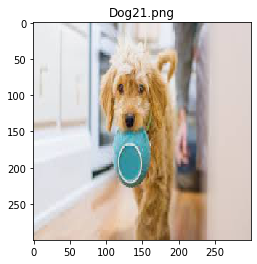

Prediction of Dog21.png:
  CNN-based model: Cat, Model Prediction Score: 0.08906876295804977
  VGG16 TL model: Dog, Model Prediction Score: 0.9913967251777649
  Xception TL model: Dog, Model Prediction Score: 0.9975615739822388


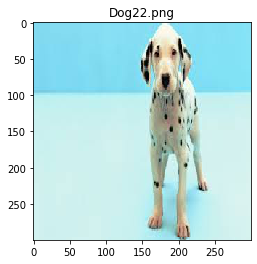

Prediction of Dog22.png:
  CNN-based model: Cat, Model Prediction Score: 0.000881036336068064
  VGG16 TL model: Dog, Model Prediction Score: 0.9999552965164185
  Xception TL model: Dog, Model Prediction Score: 0.9963575005531311


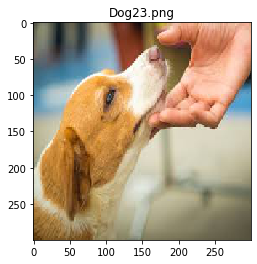

Prediction of Dog23.png:
  CNN-based model: Cat, Model Prediction Score: 0.5441145300865173
  VGG16 TL model: Dog, Model Prediction Score: 0.9680817127227783
  Xception TL model: Dog, Model Prediction Score: 0.9897910952568054


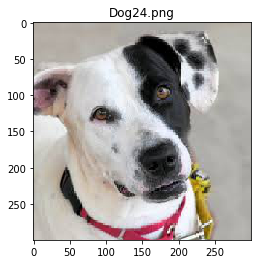

Prediction of Dog24.png:
  CNN-based model: Dog, Model Prediction Score: 0.7917267680168152
  VGG16 TL model: Dog, Model Prediction Score: 0.9999991655349731
  Xception TL model: Dog, Model Prediction Score: 0.9997639060020447


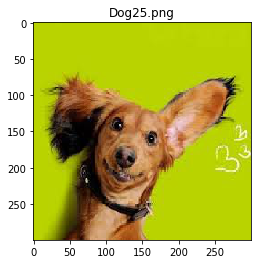

Prediction of Dog25.png:
  CNN-based model: Dog, Model Prediction Score: 0.7598403692245483
  VGG16 TL model: Dog, Model Prediction Score: 0.9999998807907104
  Xception TL model: Dog, Model Prediction Score: 0.9986096620559692


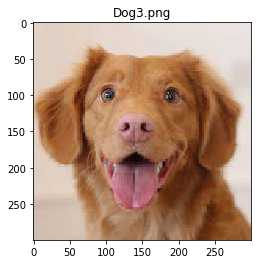

Prediction of Dog3.png:
  CNN-based model: Dog, Model Prediction Score: 0.7135832905769348
  VGG16 TL model: Dog, Model Prediction Score: 0.9999227523803711
  Xception TL model: Dog, Model Prediction Score: 0.9951155185699463


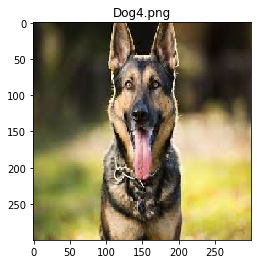

Prediction of Dog4.png:
  CNN-based model: Dog, Model Prediction Score: 0.7040433883666992
  VGG16 TL model: Dog, Model Prediction Score: 0.9999803304672241
  Xception TL model: Dog, Model Prediction Score: 0.9914467334747314


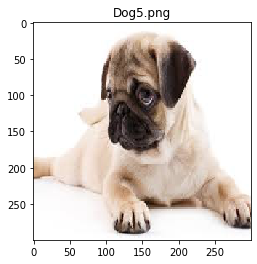

Prediction of Dog5.png:
  CNN-based model: Cat, Model Prediction Score: 0.5903540253639221
  VGG16 TL model: Dog, Model Prediction Score: 0.9984619617462158
  Xception TL model: Dog, Model Prediction Score: 0.9192904233932495


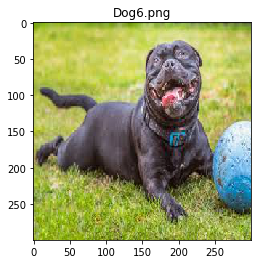

Prediction of Dog6.png:
  CNN-based model: Dog, Model Prediction Score: 0.8886158466339111
  VGG16 TL model: Dog, Model Prediction Score: 0.9999868869781494
  Xception TL model: Dog, Model Prediction Score: 0.9994916915893555


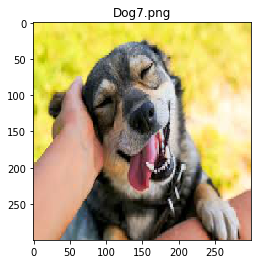

Prediction of Dog7.png:
  CNN-based model: Cat, Model Prediction Score: 0.6038179993629456
  VGG16 TL model: Dog, Model Prediction Score: 0.9998112320899963
  Xception TL model: Dog, Model Prediction Score: 0.999039351940155


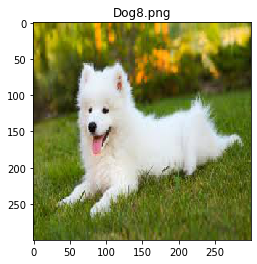

Prediction of Dog8.png:
  CNN-based model: Dog, Model Prediction Score: 0.835031270980835
  VGG16 TL model: Dog, Model Prediction Score: 0.7848120331764221
  Xception TL model: Dog, Model Prediction Score: 0.9855716228485107


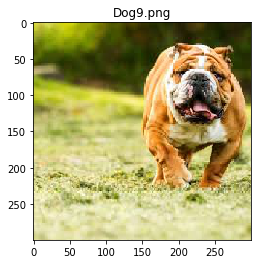

Prediction of Dog9.png:
  CNN-based model: Cat, Model Prediction Score: 0.423984169960022
  VGG16 TL model: Dog, Model Prediction Score: 0.9999990463256836
  Xception TL model: Dog, Model Prediction Score: 0.9920359253883362


In [143]:
# Correct Prediction Counts of the model
cnnCorrect = 0; vgg16Correct = 0; xceptionCorrect = 0

# predict an unknown image
def predict(modelList, img, fileName):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    plt.imshow(img)
    plt.title(fileName)
    plt.show()
    x = x/255.0
    """
    modelList[0] --> CNN-based model built from scratch
    modelList[1] --> VGG16-based Transfer Learning (TL) model
    modelList[2] --> Xception-based Transfer Learning (TL) model
    > The predictions of each of the models for each inference image
      downloaded from the internet are printed as below.
    > The threshold for the prediction is set as follows:
        * CNN-based model: if (prediction > 0.65) then 'Dog' else 'Cat'
        * VGG16-based TL model: if (prediction > 0.5) then 'Dog' else 'Cat'
        * Xception-based TL model: if (prediction > 0.5) then 'Dog' else 'Cat'
    """
    preds0 = modelList[0].predict(x); cnnPredict = 'Dog' if (preds0[0] > 0.65) else 'Cat'
    preds1 = modelList[1].predict(x); vgg16Predict = 'Dog' if (preds1[0] > 0.5) else 'Cat'
    preds2 = modelList[2].predict(x); xceptionPredict = 'Dog' if (preds2[0] > 0.5) else 'Cat'
    print("Prediction of {}:\n  CNN-based model: {}, Model Prediction Score: {}\n  VGG16 TL model: {}, Model Prediction Score: {}\n  Xception TL model: {}, Model Prediction Score: {}".format(
            fileName, cnnPredict, preds0[0][0], vgg16Predict, preds1[0][0], xceptionPredict, preds2[0][0])
         )
    global cnnCorrect; global vgg16Correct; global xceptionCorrect; 
    if cnnPredict == fileName[0:3]:
        cnnCorrect += 1
    if vgg16Predict == fileName[0:3]:
        vgg16Correct += 1
    if xceptionPredict == fileName[0:3]:
        xceptionCorrect += 1
    
modelObjectList = [ cnnCatDogModel, vgg16CatDogModel, xceptionCatDogModel ]

for infImageFile in fileList:
    infImage = image.load_img(infImgPath + '/' + infImageFile, target_size = (300, 300))
    predict(modelObjectList, infImage, infImageFile)
 

### Observations from Model Inference

Out of the 3 developed models the **Xception TL-based model** is the most accurate at extracting features from the images and classifying them. In contrast, the *CNN-based model* is less accurate in the classification task while the *VGG16 TL-based model* performs quite well, with occassional instances of misclassification.

From the images the **CNN-based model** seems to misclassify images of dogs showing their teeth with rounded (not pointy) ears.

Also in certain occasions, the **VGG16 TL-based model** misclassifies images of cats with fur of slightly darker shade of brown ~ especially ones which have other object in them, like people caressing their cat.

The following cell displays the number of correct classifications made by each of the models out of all the 50 images not belonging in the test/validation dataset.

In [144]:
print("""Out of 50 inference images downloaded from the internet, number of correct classifications for each of the models:
CNN-based Classifier: {}
VGG16 Transfer Learning Classifier: {}
Xception Transfer Learning Classifier: {}
      """.format(cnnCorrect, vgg16Correct, xceptionCorrect)
     )

Out of 50 inference images downloaded from the internet, number of correct classifications for each of the models:
CNN-based Classifier: 40
VGG16 Transfer Learning Classifier: 47
Xception Transfer Learning Classifier: 50
      


## More Inferencing - Just For FUN !! 😏

Just for interest, images containing **both** Cats & Dogs are inferenced upon by the 3 models and their predictions are observed. Usually such an exercise presents an opportunity to develop an intuition of which specific features of the object is being extracted by the model in order to make the respective classification. However, this is **ONLY** to develop an intuition & is not for developing a ground rule which provides concrete explanation of how the models classify. The following cell illustrates the findings.

#### Observations:
1. *In the image, if the cat is larger than the dog, then on average most models classify the image as a Cat - similarly, vice versa for Dogs.*
2. *The feature of pointy ears with a short snout seems to stand out in all the images classified as a Cat, while images containing prominent features of objects with longer snouts with a darker nose are classified as Dog.*

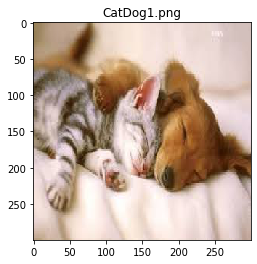

Prediction of CatDog1.png:
  CNN-based model: Dog, Model Prediction Score: 0.7116519212722778
  VGG16 TL model: Cat, Model Prediction Score: 0.001160278683528304
  Xception TL model: Dog, Model Prediction Score: 0.8175704479217529


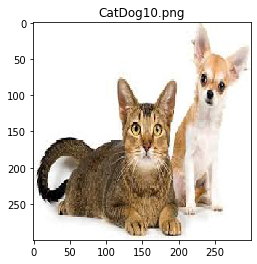

Prediction of CatDog10.png:
  CNN-based model: Cat, Model Prediction Score: 0.017112702131271362
  VGG16 TL model: Cat, Model Prediction Score: 0.00020429622964002192
  Xception TL model: Cat, Model Prediction Score: 0.06839625537395477


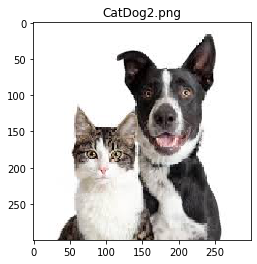

Prediction of CatDog2.png:
  CNN-based model: Dog, Model Prediction Score: 0.6583539843559265
  VGG16 TL model: Dog, Model Prediction Score: 0.9270707368850708
  Xception TL model: Dog, Model Prediction Score: 0.9710187911987305


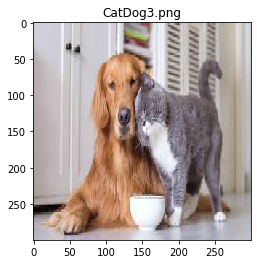

Prediction of CatDog3.png:
  CNN-based model: Dog, Model Prediction Score: 0.8703058362007141
  VGG16 TL model: Dog, Model Prediction Score: 0.9923370480537415
  Xception TL model: Dog, Model Prediction Score: 0.9820680022239685


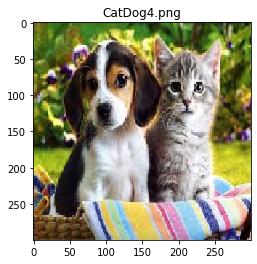

Prediction of CatDog4.png:
  CNN-based model: Cat, Model Prediction Score: 0.5456812977790833
  VGG16 TL model: Dog, Model Prediction Score: 0.88602215051651
  Xception TL model: Cat, Model Prediction Score: 0.3580159842967987


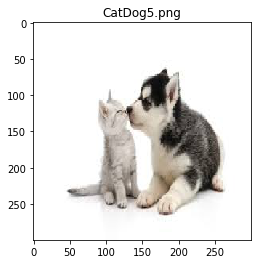

Prediction of CatDog5.png:
  CNN-based model: Cat, Model Prediction Score: 0.1026078388094902
  VGG16 TL model: Cat, Model Prediction Score: 0.06607969850301743
  Xception TL model: Cat, Model Prediction Score: 0.10674095898866653


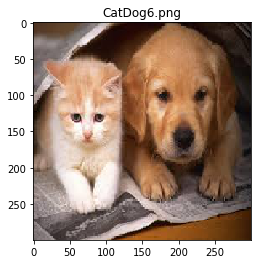

Prediction of CatDog6.png:
  CNN-based model: Dog, Model Prediction Score: 0.7951094508171082
  VGG16 TL model: Dog, Model Prediction Score: 0.9998109936714172
  Xception TL model: Dog, Model Prediction Score: 0.9453234076499939


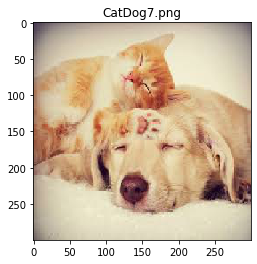

Prediction of CatDog7.png:
  CNN-based model: Cat, Model Prediction Score: 0.28004172444343567
  VGG16 TL model: Dog, Model Prediction Score: 0.9886320233345032
  Xception TL model: Dog, Model Prediction Score: 0.935029923915863


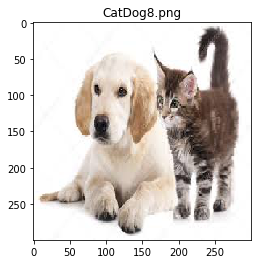

Prediction of CatDog8.png:
  CNN-based model: Dog, Model Prediction Score: 0.7361918091773987
  VGG16 TL model: Dog, Model Prediction Score: 0.9735459089279175
  Xception TL model: Dog, Model Prediction Score: 0.984161376953125


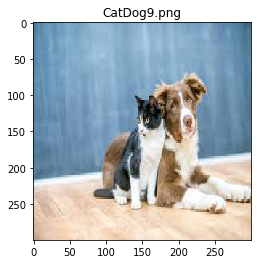

Prediction of CatDog9.png:
  CNN-based model: Cat, Model Prediction Score: 0.2680932879447937
  VGG16 TL model: Dog, Model Prediction Score: 0.9528476595878601
  Xception TL model: Dog, Model Prediction Score: 0.9934990406036377


In [145]:
#Just for fun inferencing on images containing both Cat & Dogs in the same frame
catDogInffileList = os.listdir("./CatDogTogetherInferenceImages/")

for catDogImg in catDogInffileList:
    infImage = image.load_img("./CatDogTogetherInferenceImages/" + catDogImg, target_size = (300, 300))
    predict(modelObjectList, infImage, catDogImg)
cnnCorrect = 0; vgg16Correct = 0; xceptionCorrect = 0

# Conclusion

In this project, updated features of **TF2.0** are explored by developing **three** different classifier models using different techniques. An in-depth analyses of the performance of the models has been conducted and respective observations have also been presented in the Notebook. *Transfer Learning* technique of building Deep Neural Networks has proven to be an effective way to build models with outstanding performance.